# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** When we run our simulation as is, without introducing any code, we see that our agent doesn't move at all. This is due to the fact that the agent isn't performing any action on the environment. This behavior is punished with a negative reward when, for instance, there's a green light with no oncoming traffic, and a positive reward when there's a red light at an intersection. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- *`agent.py`*: There are three flags that change the simulation:
    - learning: Indicates if the agent is in learning/training mode.
    - testing: Is set to True if testing trials are being used once training trials have completed.
    - alpha: Learning factor (it defaults to 0.5). The learning rate determines how much the agent learns from new information. 0 means translates in the agent learning nothing at all, while a value of 1 means the agent will discard old information. 
- *`environment.py`*: The `act()` method is called when an agent performs an action.
- *`simulator.py`*: The `render_text()` method displays text information about the simulation, while the `render()` methods displays a graphic simulation of the agent acting on the environment.
- *`planner.py`*: It will consider East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


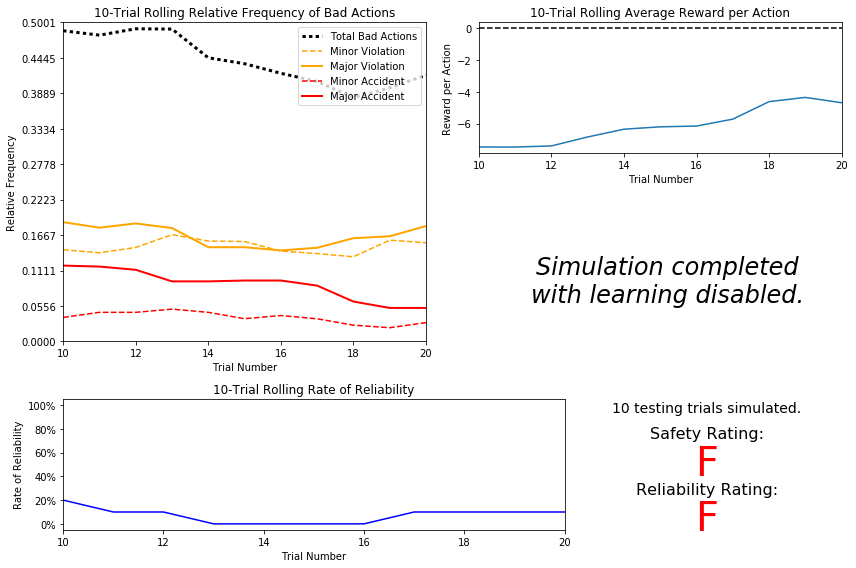

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**10-Trial Rolling Relative Frequency of Bad Actions**

We can evidence the following:
 - Around 45% of the actions taken by the agent are considered bad.
 - Around 16.6% of the actions taken by the agent are minor violations.
 - Around 19% of the actions taken by the agent are major violations.
 - Around 10% of the actions taken by the agent derive in major accidents.
 - Around 0.5% of the actions taken by the agent derive in minor accidents.
 
Given the agent isn't learning from his actions, the outcome doesn't change over time. This means that its behavior doesn't improve overall.

**10-Trial Rolling Average Reward per Action**

In the graph we can see that all the rewards received by the agent, on average, are negative, which means it has been punished more times than positively rewarded. This situation isn't unexpected given the random nature of the choices made by the agent.

**10-Trial Rolling Rate of Reliability** 

We can notice that the average reliability of the agent is around 15%, which indicates a very poor performance. Yet again, an agent that behaves randomly is expected to not make the best choices to reach its destination on time.

**10 testing trials simulated**

This smartcab can't be considered safe (almost half of the time the actions it takes are considered bad, and end in severe accidents) nor reliable (only 15% of the time, on average, it reaches its destination on time). Hence, the F grade in both categories.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** In order for the agent to drive **safely**, it must know the location of the vehicles coming from the left side and in the intersection, so it can avoid crashes. The right side is irrelevant since it has no bearing on U.S. right-of-way traffic laws. Also, it must know the color of the semaphore lights so it can learn not to move forward when the light is red.

Also it most make use of the **waypoint** feature to know where the destination is.

We can leave out **deadline** because independently of the number of the actions remaining, the agent is expected to learn to reach its destination optimally (safe and on time).

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** Let's calculate the state space cardinality:

- Light: 2 possible values: Red or Green..
- Left: 4 possible values: None, Forward, Left, Right.
- Oncoming: 4 possible values: None, Forward, Left, Right.
- Waypoint: 3 possible values: Forward, Left, Right.

In total, the size of the state space is 2 x 4 x 4 x 3 = 96. This is a reasonable amount of states for the agent to learn a policy for each of them within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

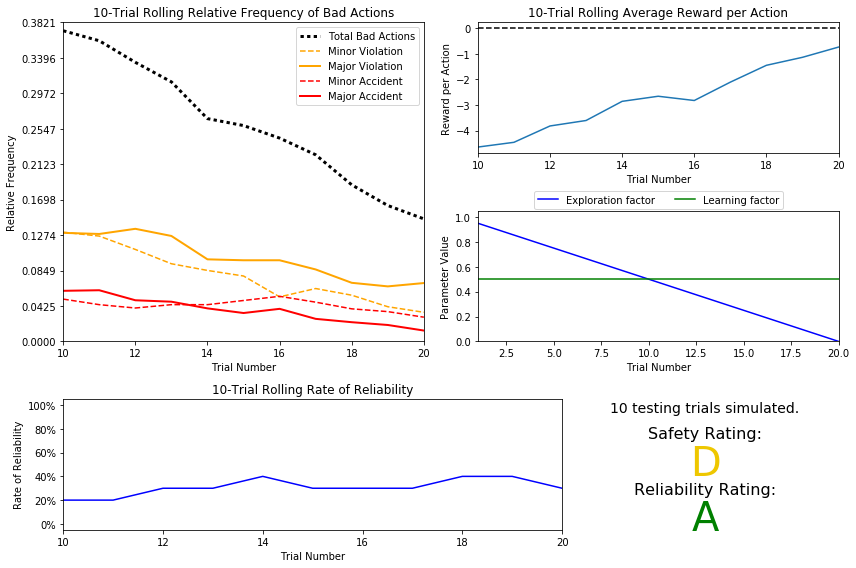

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

** Are there any observations that are similar between the basic driving agent and the default Q-Learning agent? ** 

In the basic case, the agent wasn't learning at all. In this case, our agent is actually learning (as we can see in the decrease of total bad actions over trials). In both cases, though, the performance is poor regarding safety (F in the basic case and D in the default learning agent.)

**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?** 

The driving agent took 20 training trials before testing. This number makes sense given the definition of our epsilon-tolerance decay function: $$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

**Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?**

Yes, we can evidence how the exploration factor (epsilon) went down, and this is because of the decay function used $e_{t+1} = e_t - 0.05$. It started at e = 1.0, which means that the agent is taking exploratory decisions 100% of the time, and it decreases as the number of trials increase, down to the value of e = 0.05, in which the agent only takes greedy actions.

**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

In the 10-Trial Rolling Relative Frequency of Bad Actions we can clearly see that the Total Bad Actions keep decreasing. In the first trial there was a 0.38 relative frequency of Total Bad Actions. By Trial number 20 we can see that the frequency decreased to 0.16, which is a considerable improvement.

In the 10-Trial Rolling Average Reward Per Action there was also a very good improvement. By Trial number 10 the Reward Per Action was less than -4, and by the time it got to Trial 20 it was near 0.0, which is a good improvement.

In the 10-Trial Rolling Rate of Reliability we can see that this time there was some change. In the basic driving agent was pratically no change in the rate of reliability. But this time we can see that the rate of reliability increased from 20% in trial 10, to around 40% in trial 20, which is an improvement (but not amazing).

**How does the safety and reliability rating compare to the initial driving agent?**

In the initial driving agent, the safety score was F, while in this case it was D (both very poor classifications). On the other hand, this agent achieves an impressive A score in reliability while the basic agent wasn't reliable at all (F).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

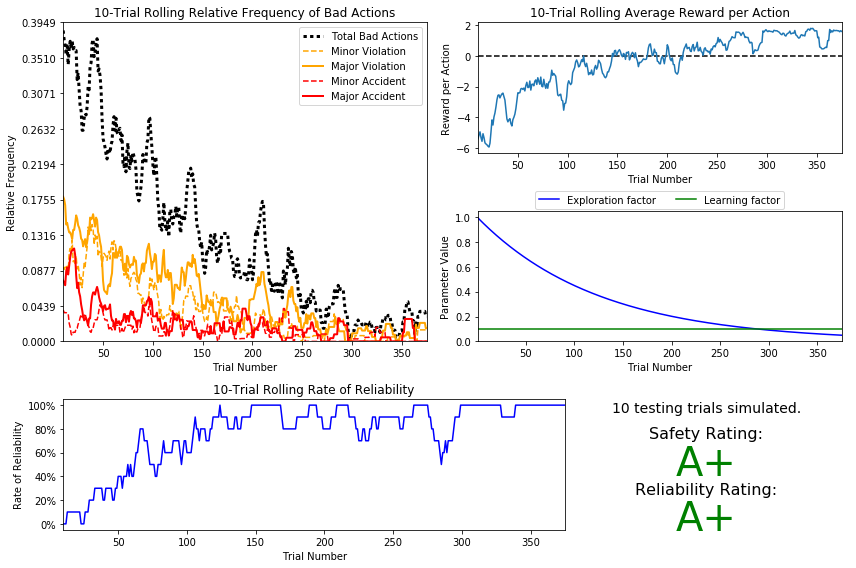

In [15]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**What decaying function was used for epsilon (the exploration factor)?**

The decaying function used for epsilon was:

$$ \epsilon = e^{-at}, \textrm{for }  a = 0.008 $$

This decaying function allows our agent to spend enough trials in the environment, giving it enough time to experience the whole states space. The `a` value was chosen by trial a 

**Approximately how many training trials were needed for your agent before begining testing?**

Around 350 training trials were needed for our agent before begining testing.

**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

I started with an epsilon value of 1.0 and decayed it until the default tolerance of 0.05. I also set the learning rate to 0.1 instead of the default 0.5 so new information wouldn't be considerd as important. This makes the simulation run longer, but it provides good results.


**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**

The improvement respect the default Q-Learner is huge. For starters, this learner achieves an A+ grade in both categories, while the default learner achieved an A in reliability and a D in safety. Also, we can see that the total number of bad actions keeps decreasing over time, reaching around 0.04 at trial 350. The trend is also positive in the rewards graph: The agent starts being punished with a reward of -6 on average by trial 10 and achieves a positive reward close to 2 by trial 350.

**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**

The agent converged to the optimal state-action values, which can be used to create an optimal policy just by following the greedy action. This means that in a given state, always select the action that has the max action-state value after training.

**Are you satisfied with the safety and reliability ratings of the *Smartcab*?**

Yes, totally! This smartcab achieves an A+ grade in both safety and reliability, completely beating the two driving agents analyzed above.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

Let's see what an optimal policy would be given what we know about the environment by examining some examples:

| Feature | Value|
| :---------------: | :---------------------: |
| Waypoint               |Forward          |
| Light               |        Red  |
| Left               |     Forward      |
| Oncoming | None|

In this case, an optimal policy would take **None** action.

---

| Feature | Value|
| :---------------: | :---------------------: |
| Waypoint               |Forward          |
| Light               |        Green  |
| Left               |     Forward      |
| Oncoming | None|

In this case, an optimal policy would move **Forward** because it is safe.

---

| Feature | Value|
| :---------------: | :---------------------: |
| Waypoint               |Left          |
| Light               |        Green  |
| Left               |     None      |
| Oncoming | None|

In this case, an optimal policy would move **Left**.

---

**For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state?**

No. Here's an example:

| Feature | Value|
| :---------------: | :---------------------: |
| Waypoint               |Right          |
| Light               |        Green  |
| Left               |     Left      |
| Oncoming | None|

Actions:

- Forward: 0.89.
- Right: 0.36.
- None: -2.15.
- Left: 0.45

As we can see, in this case the optimal action to perform would be to turn **right** given that the light is green for our agent, the car in the left is turning left (but its light is red) and there aren't oncoming vehicles in the intersection. However, the highest valued action is **Forward**, with 0.89. This might be due to the agent not having visited this state enough times to learn the optimal policy.

On the other hand, here's an example where our policy is optimal for the given state:

| Feature | Value|
| :---------------: | :---------------------: |
| Waypoint               |Left          |
| Light               |        Green  |
| Left               |     None      |
| Oncoming | Left|

Actions:
 - Forward : 0.57
 - Right : 0.66
 - None : -3.34
 - Left : 1.82

Given that our waypoint says left and our light is green, is safe to take this turn. Moreover, there's no vehicle on the left and although the oncoming vehicle is turning left, by definition, its light is red so it cannot move, thus, our move is safe. Hence, the Left actions has the highest value: 1.82.

**Are there any states where the policy is different than what would be expected from an optimal policy? Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.
**

| Feature | Value|
| :---------------: | :---------------------: |
| Waypoint               |Right          |
| Light               |        Red  |
| Left               |     Forward      |
| Oncoming | Right|

Actions:
 - Forward : 0.00
 - Right : 0.00
 - None : 0.31
 - Left : 0.00
 
*Bad Actions*:
- Moving forward (Reward = 0): It would cause an accident by crashing with the oncoming vehicle.
- Moving left (Reward = 0): It would cause an accident by crashing with the vehicle coming from the left.

*Good Actions*:
- None (Reward = 0.31): Given it is a red light, not moving at all makes perfect sense.
- Right (Reward = 0.0): Given that the oncoming vehicle is turning right and the vehicle at the left is going forward, we could safely turn right.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.